#### Simulation: Different ACs

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import matplotlib.pyplot as plt

from utills.geodata import generate_grid_dataframe,calculate_moran_i

from utills.adjacency_simplex import AdjacencySimplex 
from utills.calculate_tda_summaries import compute_persistence

In [2]:
NUM_OF_ITERATIONS = 50
GRID_SIZE = 12

# Set the random seed
# np.random.seed(0)

RANDOM_SEED_LIST = list(range(NUM_OF_ITERATIONS))

In [3]:
# create a empty df to store the results
results_df = pd.DataFrame(columns=['Iteration', 'Random Seed','Autocorrlation', 'Moran I', 'Filter Method', 'Number of H0 Points', 'TL', 'AL', 'TML', 'AML','Average'])


In [4]:

i = 0 
for iter in range(NUM_OF_ITERATIONS):

    # print(f"Iteration: {iter}")
    RANDOM_SEED = RANDOM_SEED_LIST[iter]

    # Generate a grid dataframe
    gdf_positive = generate_grid_dataframe(grid_side_length=GRID_SIZE, autocorrelation="positive", random_seed=RANDOM_SEED)
    gdf_negative = generate_grid_dataframe(grid_side_length=GRID_SIZE, autocorrelation="negative", random_seed=RANDOM_SEED)
    gdf_random = generate_grid_dataframe(grid_side_length=GRID_SIZE, autocorrelation="none", random_seed=RANDOM_SEED)
    gdf_cluster = generate_grid_dataframe(grid_side_length=GRID_SIZE, autocorrelation="cluster", random_seed=RANDOM_SEED)

    # add to a dictionary
    gdf_dict = {'positive': gdf_positive, 'negative': gdf_negative, 'random': gdf_random, 'cluster': gdf_cluster}

    for key, gdf in gdf_dict.items():

        # Calculate the average
        average = gdf['Value'].mean()

        # Calculate Moran I
        moran_i = calculate_moran_i(gdf, GRID_SIZE)

        for filter_method in ['up','down']:

            # Initialize the AdjacencySimplex class
            adj_simplex = AdjacencySimplex(gdf, 'Value', threshold = None, filter_method = filter_method)

            # Filter the GeoDataFrame
            filtered_df,gdf_id = adj_simplex.filter_sort_gdf()

            # Calculate the adjacent countries
            adj_simplex.calculate_adjacent_countries()

            # Form the simplicial complex
            simplex = adj_simplex.form_simplicial_complex()

            # Compute the persistence
            _,TL, AL, TML, AML,_ = compute_persistence(simplices=simplex,filtered_df=filtered_df,variable_name='Value')

            # Add the results to the results_df

            new_row = pd.DataFrame({'Iteration': [i], 'Random Seed': [RANDOM_SEED],'Autocorrlation': [key], 'Moran I': [moran_i], 'Filter Method': [filter_method], 'Number of H0 Points': [len(filtered_df)], 'TL': [TL], 'AL': [AL], 'TML': [TML], 'AML': [AML],'Average': [average]})
            results_df = pd.concat([results_df, new_row], ignore_index=True)
        i+=1


/var/folders/j3/904q7dbj02j_jyjz7pvfgz384d40kw/T/ipykernel_43997/2217853720.py:44: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_df = pd.concat([results_df, new_row], ignore_index=True)


In [5]:
results_df.head(3)

,Iteration,Random Seed,Autocorrlation,Moran I,Filter Method,Number of H0 Points,TL,AL,TML,AML,Average
0,0,0,positive,0.884715,up,144,74.340817,0.516256,37.170408,0.258128,0.514803
1,0,0,positive,0.884715,down,144,13.871618,0.096331,6.935809,0.048165,0.514803
2,1,0,negative,-0.990063,up,144,38.702383,0.489904,15.410571,0.195071,-0.004173


Filter Method: UP

Autocorrlation: Positive

In [6]:
filter = 'down'

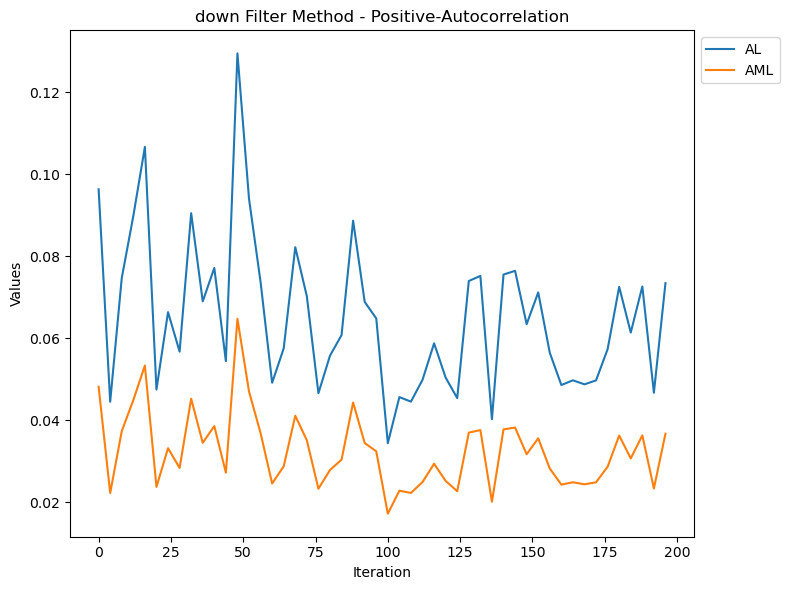

In [7]:
temp = results_df[(results_df['Filter Method'] == filter) & (results_df['Autocorrlation'] == 'positive')]

# Create a figure and axis
fig, ax = plt.subplots(figsize=(8, 6))

# Plot all columns against 'Iteration' on the same plot
ax.plot(temp['Iteration'], temp['AL'], label='AL')
ax.plot(temp['Iteration'], temp['AML'], label='AML')
# ax.plot(temp['Iteration'], temp['Average'], label='Average')

# Labels and title
ax.set_xlabel('Iteration')
ax.set_ylabel('Values')
ax.set_title(f"{filter} Filter Method - Positive-Autocorrelation")

# Add legend outside the plot
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Adjust layout to fit the legend
plt.tight_layout()

# Show the plot
# plt.show()
plt.savefig(f"results/{filter}_positive.png", dpi = 300)


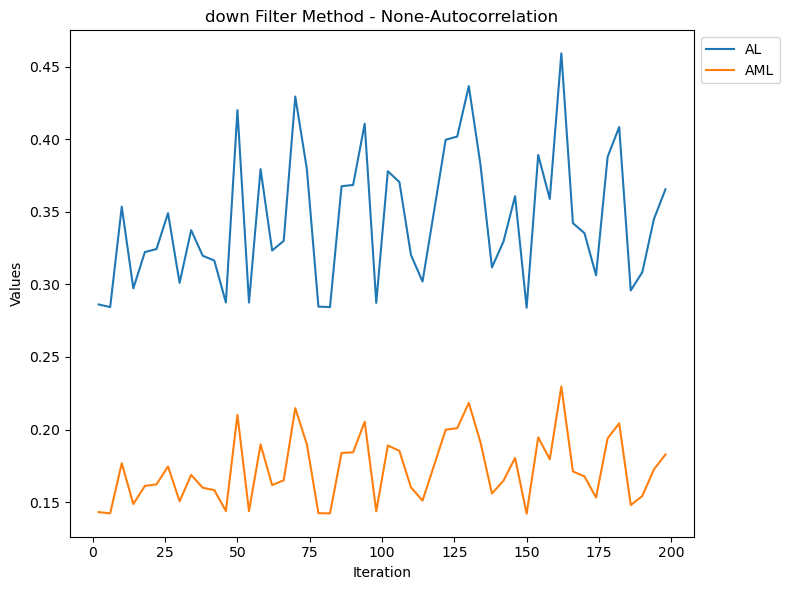

In [8]:
temp = results_df[(results_df['Filter Method'] == filter) & (results_df['Autocorrlation'] == 'random')]

# Create a figure and axis
fig, ax = plt.subplots(figsize=(8, 6))

# Plot all columns against 'Iteration' on the same plot
ax.plot(temp['Iteration'], temp['AL'], label='AL')
ax.plot(temp['Iteration'], temp['AML'], label='AML')
# ax.plot(temp['Iteration'], temp['Average'], label='Average')

# Labels and title
ax.set_xlabel('Iteration')
ax.set_ylabel('Values')
ax.set_title(f"{filter} Filter Method - None-Autocorrelation")

# Add legend outside the plot
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Adjust layout to fit the legend
plt.tight_layout()

# Show the plot
# plt.show()
plt.savefig(f"results/{filter}_none.png", dpi = 300)


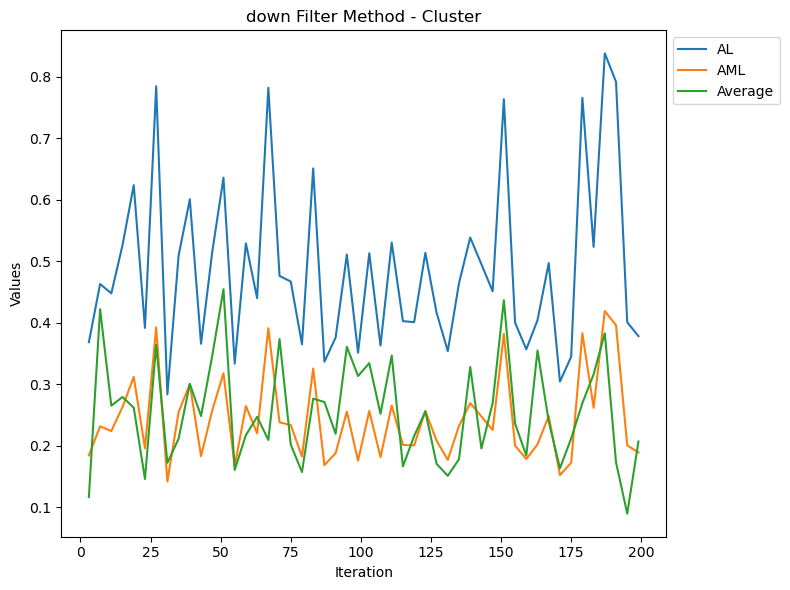

In [9]:
temp = results_df[(results_df['Filter Method'] == filter) & (results_df['Autocorrlation'] == 'cluster')]

# Create a figure and axis
fig, ax = plt.subplots(figsize=(8, 6))

# Plot all columns against 'Iteration' on the same plot
ax.plot(temp['Iteration'], temp['AL'], label='AL')
ax.plot(temp['Iteration'], temp['AML'], label='AML')
ax.plot(temp['Iteration'], temp['Average'], label='Average')

# Labels and title
ax.set_xlabel('Iteration')
ax.set_ylabel('Values')
ax.set_title(f"{filter} Filter Method - Cluster")

# Add legend outside the plot
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Adjust layout to fit the legend
plt.tight_layout()

# Show the plot
plt.show()


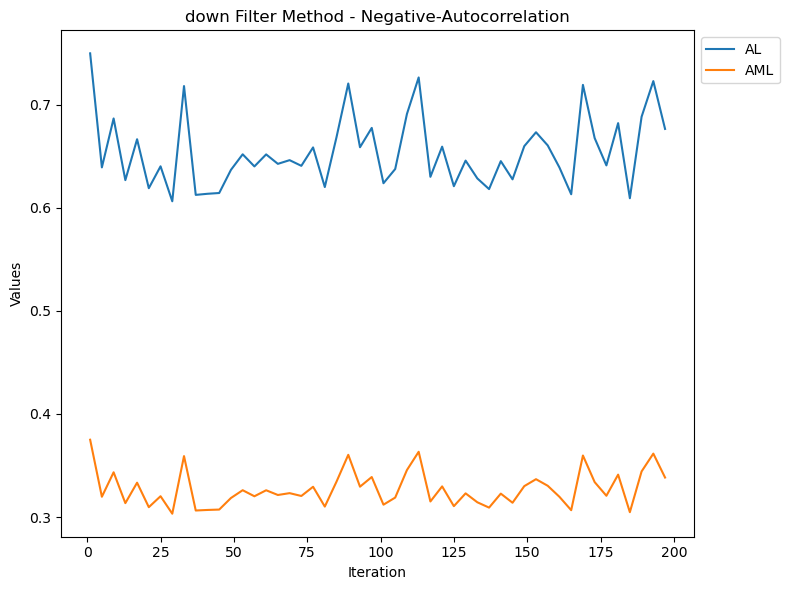

In [10]:
temp = results_df[(results_df['Filter Method'] == filter) & (results_df['Autocorrlation'] == 'negative')]

# Create a figure and axis
fig, ax = plt.subplots(figsize=(8, 6))

# Plot all columns against 'Iteration' on the same plot
ax.plot(temp['Iteration'], temp['AL'], label='AL')
ax.plot(temp['Iteration'], temp['AML'], label='AML')
# ax.plot(temp['Iteration'], temp['Average'], label='Average')

# Labels and title
ax.set_xlabel('Iteration')
ax.set_ylabel('Values')
ax.set_title(f"{filter} Filter Method - Negative-Autocorrelation")

# Add legend outside the plot
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Adjust layout to fit the legend
plt.tight_layout()

# Show the plot
# plt.show()

plt.savefig(f"results/{filter}_negative.png", dpi = 300)


In [ ]:
filter = 'down'
temp1 = results_df[(results_df['Filter Method'] == filter) & (results_df['Autocorrlation'] == 'random')]
temp2 = results_df[(results_df['Filter Method'] == filter) & (results_df['Autocorrlation'] == 'positive')]
temp3 = results_df[(results_df['Filter Method'] == filter) & (results_df['Autocorrlation'] == 'negative')]

In [12]:
temp1.head()

,Iteration,Random Seed,Autocorrlation,Moran I,Filter Method,Number of H0 Points,TL,AL,TML,AML,Average
5,2,0,random,0.089683,down,144,41.211154,0.286189,20.605577,0.143094,0.514803
13,6,1,random,-0.092597,down,144,40.950766,0.284380,20.475383,0.142190,0.506956
21,10,2,random,-0.081106,down,144,50.917074,0.353591,25.458537,0.176795,0.487088
29,14,3,random,0.043038,down,144,42.805883,0.297263,21.402942,0.148632,0.490429
37,18,4,random,-0.055495,down,144,46.411050,0.322299,23.205525,0.161149,0.503529


In [14]:
# rename AL and AML columns
temp1 = temp1.rename(columns={'AL': 'AL random', 'AML': 'AML random'})
temp2 = temp2.rename(columns={'AL': 'AL positive', 'AML': 'AML positive'})
temp3 = temp3.rename(columns={'AL': 'AL negative', 'AML': 'AML negative'})

# drop iteration column
temp1 = temp1.drop(columns=['Iteration'])
temp2 = temp2.drop(columns=['Iteration'])
temp3 = temp3.drop(columns=['Iteration'])

# rename Random Seed column as Iteration
temp1 = temp1.rename(columns={'Random Seed': 'Iteration'})
temp2 = temp2.rename(columns={'Random Seed': 'Iteration'})
temp3 = temp3.rename(columns={'Random Seed': 'Iteration'})

In [15]:
temp2.head()

,Iteration,Autocorrlation,Moran I,Filter Method,Number of H0 Points,TL,AL positive,TML,AML positive,Average
1,0,positive,0.884715,down,144,13.871618,0.096331,6.935809,0.048165,0.514803
9,1,positive,0.840235,down,144,6.409651,0.044511,3.204825,0.022256,0.506956
17,2,positive,0.861691,down,144,10.753033,0.074674,5.376517,0.037337,0.487088
25,3,positive,0.862857,down,144,12.933693,0.089817,6.466847,0.044909,0.490429
33,4,positive,0.894635,down,144,15.361548,0.106677,7.680774,0.053339,0.503529


In [16]:
temp1 = temp1[['Iteration', 'AL random', 'AML random']]
temp2 = temp2[['Iteration', 'AL positive', 'AML positive']]
temp3 = temp3[['Iteration', 'AL negative', 'AML negative']]
# merge the dataframes

temp = pd.merge(temp1, temp2, on='Iteration')
temp = pd.merge(temp, temp3, on='Iteration')

In [17]:
temp.head()

,Iteration,AL random,AML random,AL positive,AML positive,AL negative,AML negative
0,0,0.286189,0.143094,0.096331,0.048165,0.749998,0.374999
1,1,0.284380,0.142190,0.044511,0.022256,0.639334,0.319667
2,2,0.353591,0.176795,0.074674,0.037337,0.686810,0.343405
3,3,0.297263,0.148632,0.089817,0.044909,0.626959,0.313480
4,4,0.322299,0.161149,0.106677,0.053339,0.666639,0.333319


In [23]:
temp_al = temp[['Iteration', 'AL random', 'AL positive', 'AL negative']]
temp_aml = temp[['Iteration', 'AML random', 'AML positive', 'AML negative']]

In [ ]:
temp_al = temp[['Iteration', 'AL random', 'AL positive', 'AL negative']]


# Create a figure and axis
fig, ax = plt.subplots(figsize=(8, 6))

# Plot all columns against 'Iteration' on the same plot
ax.plot

# Labels and title
ax.set_xlabel('Iteration')
ax.set_ylabel('Summary Values')
# ax.set_title(f"{filter} Filter Method - Negative-Autocorrelation")

# Add legend outside the plot
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Adjust layout to fit the legend
plt.tight_layout()

# Show the plot
# plt.show()

plt.savefig(f"results/comparison.png", dpi = 300)


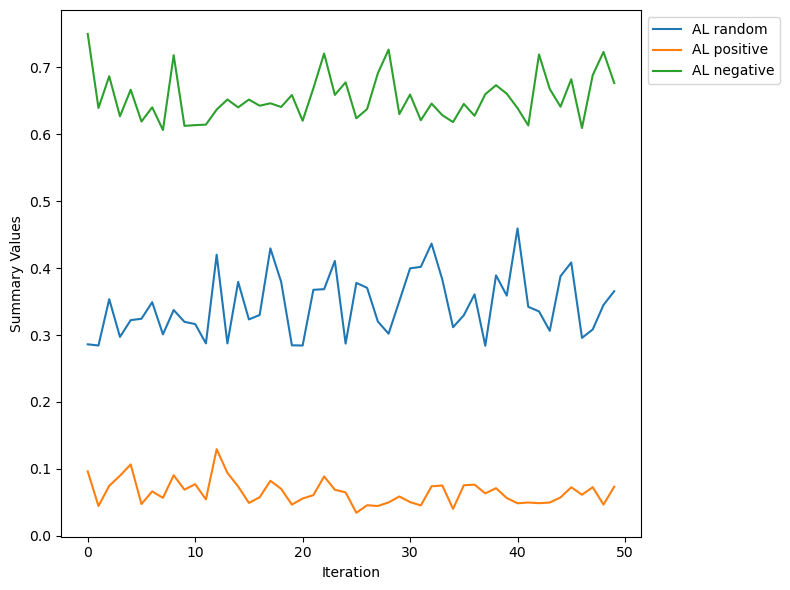

In [19]:
# Create the plot
fig, ax = plt.subplots(figsize=(8, 6))

# Plot all columns against 'Iteration' on the same plot
for column in temp_al.columns[1:]:  # Skip 'Iteration'
    ax.plot(temp_al["Iteration"], temp_al[column], label=column)

# Labels and title
ax.set_xlabel('Iteration')
ax.set_ylabel('Summary Values')
# ax.set_title(f"{filter} Filter Method - Negative-Autocorrelation")

# Add legend outside the plot
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Adjust layout to fit the legend
plt.tight_layout()

# Save the plot
plt.savefig(f"results/comparison.png", dpi = 300)

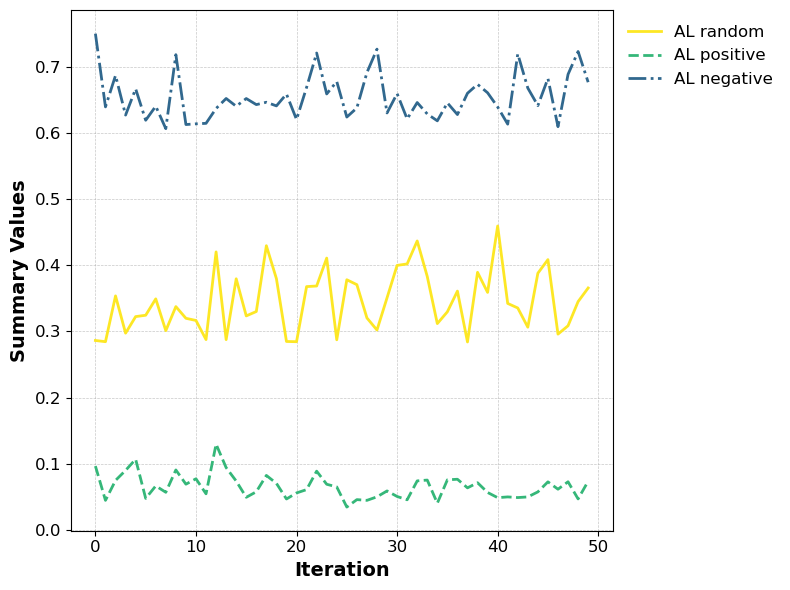

In [21]:
import matplotlib.pyplot as plt

# Create the plot
fig, ax = plt.subplots(figsize=(8, 6))

# Define line styles and colors for differentiation
line_styles = ['-', '--', '-.', ':']
colors = plt.cm.viridis_r  # Reverse viridis colormap for better contrast

# Plot all columns against 'Iteration' with improved aesthetics
for idx, column in enumerate(temp_al.columns[1:]):  # Skip 'Iteration'
    ax.plot(temp_al["Iteration"], temp_al[column], 
            label=column, 
            linestyle=line_styles[idx % len(line_styles)], 
            linewidth=2, 
            color=colors(idx / len(temp_al.columns[1:])))

# Labels and title
ax.set_xlabel('Iteration', fontsize=14, fontweight='bold')
ax.set_ylabel('Summary Values', fontsize=14, fontweight='bold')
# ax.set_title(f"{filter} Filter Method - Negative-Autocorrelation", fontsize=14, fontweight='bold')

# Customize ticks
ax.tick_params(axis='both', which='major', labelsize=12)

# Add grid for better readability
ax.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)

# Add legend outside the plot
ax.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=12, frameon=False)

# Adjust layout to fit the legend
plt.tight_layout()

# Save the plot in high-quality vector format for papers
plt.savefig("results/comparison_AL.png", dpi=300, bbox_inches='tight')  # Optional PNG for quick previews

# Show the plot
plt.show()


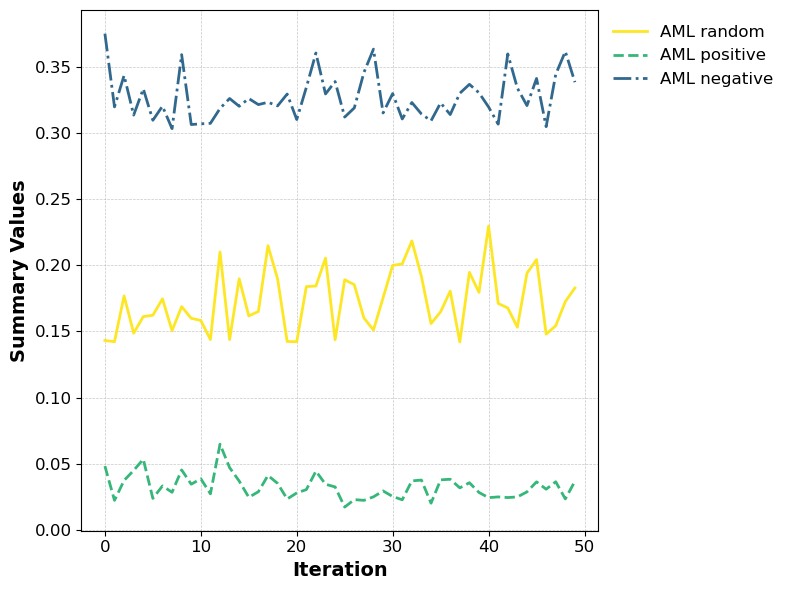

In [24]:
import matplotlib.pyplot as plt

# Create the plot
fig, ax = plt.subplots(figsize=(8, 6))

# Define line styles and colors for differentiation
line_styles = ['-', '--', '-.', ':']
colors = plt.cm.viridis_r  # Reverse viridis colormap for better contrast

# Plot all columns against 'Iteration' with improved aesthetics
for idx, column in enumerate(temp_aml.columns[1:]):  # Skip 'Iteration'
    ax.plot(temp_aml["Iteration"], temp_aml[column], 
            label=column, 
            linestyle=line_styles[idx % len(line_styles)], 
            linewidth=2, 
            color=colors(idx / len(temp_aml.columns[1:])))

# Labels and title
ax.set_xlabel('Iteration', fontsize=14, fontweight='bold')
ax.set_ylabel('Summary Values', fontsize=14, fontweight='bold')
# ax.set_title(f"{filter} Filter Method - Negative-Autocorrelation", fontsize=14, fontweight='bold')

# Customize ticks
ax.tick_params(axis='both', which='major', labelsize=12)

# Add grid for better readability
ax.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)

# Add legend outside the plot
ax.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=12, frameon=False)

# Adjust layout to fit the legend
plt.tight_layout()

# Save the plot in high-quality vector format for papers
plt.savefig("results/comparison_AML.png", dpi=300, bbox_inches='tight')  # Optional PNG for quick previews

# Show the plot
plt.show()

In [25]:
filter = 'down'
temp11 = results_df[(results_df['Filter Method'] == filter) & (results_df['Autocorrlation'] == 'random')]
temp22 = results_df[(results_df['Filter Method'] == filter) & (results_df['Autocorrlation'] == 'positive')]
temp33 = results_df[(results_df['Filter Method'] == filter) & (results_df['Autocorrlation'] == 'negative')]

In [28]:
temp11 = temp11[['Random Seed', 'AL', 'AML']]
temp22 = temp22[['Random Seed', 'AL', 'AML']]
temp33 = temp33[['Random Seed', 'AL', 'AML']]

# rename random seed column as Iteration
temp11 = temp11.rename(columns={'Random Seed': 'Iteration'})
temp22 = temp22.rename(columns={'Random Seed': 'Iteration'})
temp33 = temp33.rename(columns={'Random Seed': 'Iteration'})


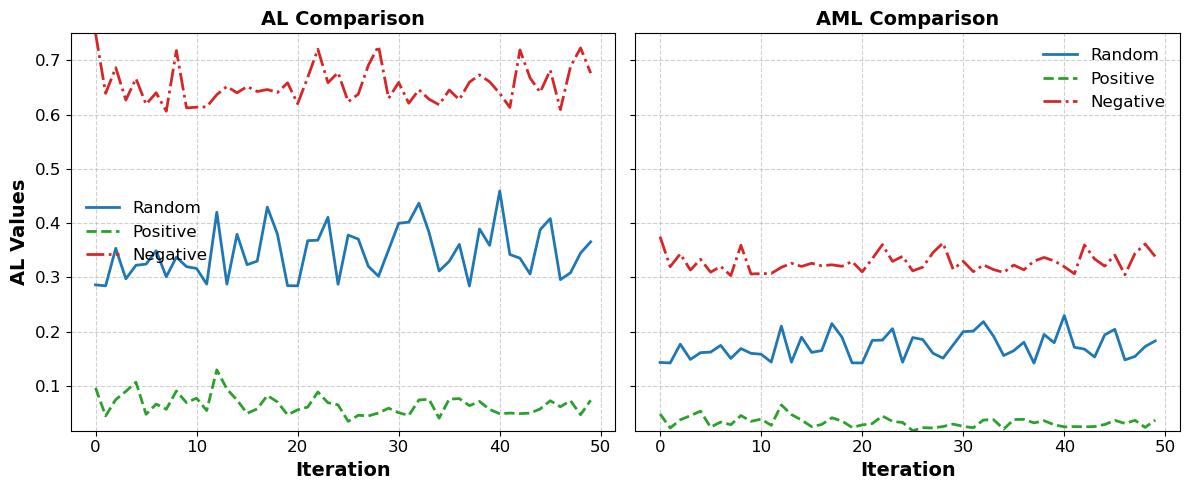

In [29]:
import matplotlib.pyplot as plt
import numpy as np

# Stack data to find global min/max for consistent y-axis
all_data_AL = np.concatenate([temp11['AL'], temp22['AL'], temp33['AL']])
all_data_AML = np.concatenate([temp11['AML'], temp22['AML'], temp33['AML']])

y_min = min(all_data_AL.min(), all_data_AML.min())  # Global minimum
y_max = max(all_data_AL.max(), all_data_AML.max())  # Global maximum

# Define line styles for differentiation
line_styles = ['-', '--', '-.']
colors = ['tab:blue', 'tab:green', 'tab:red']
labels = ['Random', 'Positive', 'Negative']

# Create subplots for AL and AML
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)  # Ensure same y-axis scale

datasets = [(temp11, temp22, temp33)]  # Grouped datasets

# AL Plot
ax = axes[0]
for idx, temp in enumerate(datasets[0]):
    ax.plot(temp['Iteration'], temp['AL'], 
            linestyle=line_styles[idx], 
            linewidth=2, 
            color=colors[idx], 
            label=labels[idx])

ax.set_xlabel('Iteration', fontsize=14, fontweight='bold')
ax.set_ylabel('AL Values', fontsize=14, fontweight='bold')
ax.set_title('AL Comparison', fontsize=14, fontweight='bold')
ax.tick_params(axis='both', labelsize=12)
ax.grid(True, linestyle='--', alpha=0.6)
ax.legend(fontsize=12, frameon=False)
ax.set_ylim(y_min, y_max)  # Set fixed y-axis scale

# AML Plot
ax = axes[1]
for idx, temp in enumerate(datasets[0]):
    ax.plot(temp['Iteration'], temp['AML'], 
            linestyle=line_styles[idx], 
            linewidth=2, 
            color=colors[idx], 
            label=labels[idx])

ax.set_xlabel('Iteration', fontsize=14, fontweight='bold')
ax.set_title('AML Comparison', fontsize=14, fontweight='bold')
ax.tick_params(axis='both', labelsize=12)
ax.grid(True, linestyle='--', alpha=0.6)
ax.legend(fontsize=12, frameon=False)
ax.set_ylim(y_min, y_max)  # Set fixed y-axis scale

# Adjust layout and save the figure
plt.tight_layout()
plt.show()


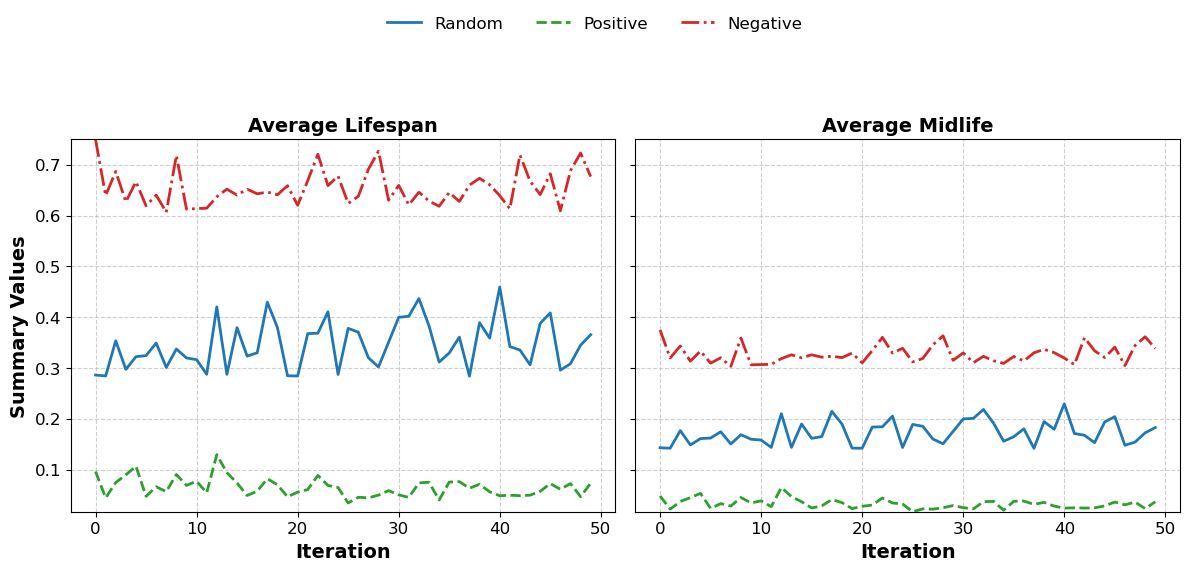

In [32]:
import matplotlib.pyplot as plt
import numpy as np

# Stack data to find global min/max for consistent y-axis
all_data_AL = np.concatenate([temp11['AL'], temp22['AL'], temp33['AL']])
all_data_AML = np.concatenate([temp11['AML'], temp22['AML'], temp33['AML']])

y_min = min(all_data_AL.min(), all_data_AML.min())  # Global minimum
y_max = max(all_data_AL.max(), all_data_AML.max())  # Global maximum

# Define line styles and colors for differentiation
line_styles = ['-', '--', '-.']
colors = ['tab:blue', 'tab:green', 'tab:red']
labels = ['Random', 'Positive', 'Negative']

# Create subplots for AL and AML
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)  # Ensure same y-axis scale

datasets = [(temp11, temp22, temp33)]  # Grouped datasets

# AL Plot
ax = axes[0]
for idx, temp in enumerate(datasets[0]):
    ax.plot(temp['Iteration'], temp['AL'], 
            linestyle=line_styles[idx], 
            linewidth=2, 
            color=colors[idx], 
            label=labels[idx])

ax.set_xlabel('Iteration', fontsize=14, fontweight='bold')
ax.set_ylabel('Summary Values', fontsize=14, fontweight='bold')
ax.set_title('Average Lifespan', fontsize=14, fontweight='bold')
ax.tick_params(axis='both', labelsize=12)
ax.grid(True, linestyle='--', alpha=0.6)
ax.set_ylim(y_min, y_max)  # Set fixed y-axis scale

# AML Plot
ax = axes[1]
for idx, temp in enumerate(datasets[0]):
    ax.plot(temp['Iteration'], temp['AML'], 
            linestyle=line_styles[idx], 
            linewidth=2, 
            color=colors[idx], 
            label=labels[idx])

ax.set_xlabel('Iteration', fontsize=14, fontweight='bold')
ax.set_title('Average Midlife', fontsize=14, fontweight='bold')
ax.tick_params(axis='both', labelsize=12)
ax.grid(True, linestyle='--', alpha=0.6)
ax.set_ylim(y_min, y_max)  # Set fixed y-axis scale

# Create a single legend outside the plots
fig.legend(labels, loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=3, fontsize=12, frameon=False)

# Adjust layout and save the figure
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Ensure space for legend
plt.savefig("results/comparison_AL_AML.png", dpi=300, bbox_inches='tight')  # Optional PNG
plt.show()


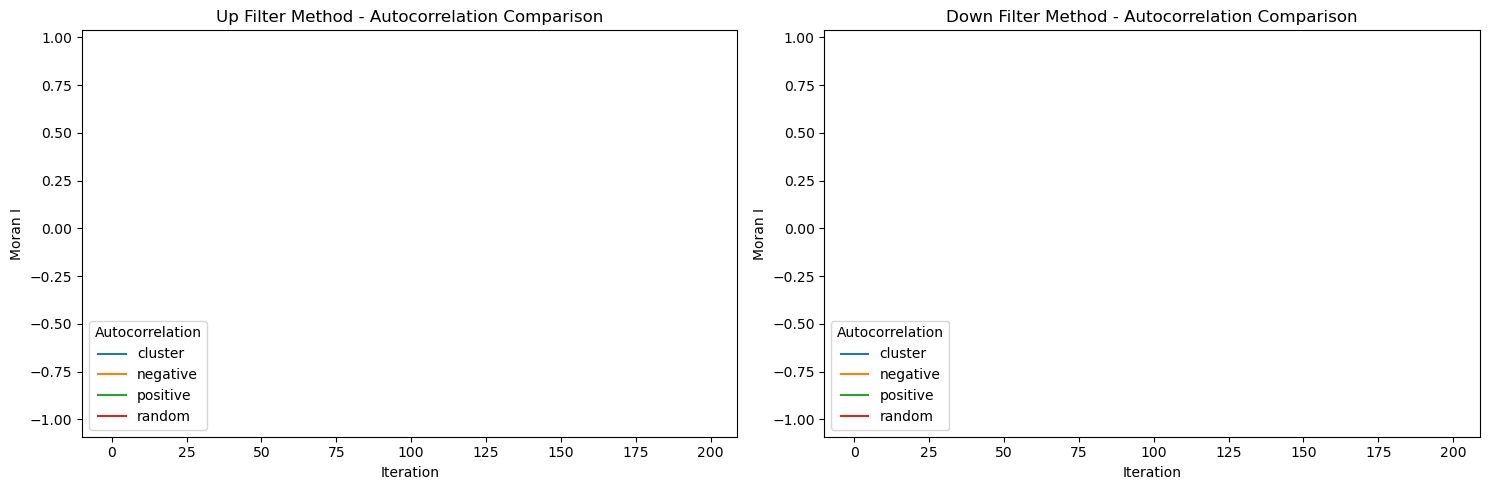

In [11]:
# Define filter methods
filter_methods = ['up', 'down']
titles = ["Up Filter Method", "Down Filter Method"]

# Create subplots for filter method comparison, then group by autocorrelation
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

for i, filter_method in enumerate(filter_methods):
    # Step 1: Filter the dataframe by filter method (up/down)
    filtered_df = results_df[results_df['Filter Method'] == filter_method]
    
    # Step 2: Group by autocorrelation, then by iteration, and compute mean TL
    grouped_df = filtered_df.groupby(['Autocorrlation', 'Iteration'])['Moran I'].mean().unstack(0)
    
    # Step 3: Plot the grouped data
    grouped_df.plot(ax=axes[i])
    
    # Set plot titles and labels
    axes[i].set_title(f"{titles[i]} - Autocorrelation Comparison")
    axes[i].set_xlabel("Iteration")
    axes[i].set_ylabel("Moran I")
    axes[i].legend(title="Autocorrelation")

# Adjust layout for better clarity
plt.tight_layout()
plt.show()

In [12]:
results_df.head()

,Iteration,Random Seed,Autocorrlation,Moran I,Filter Method,Number of H0 Points,TL,AL,TML,AML,Average
0,0,0,positive,0.884715,up,144,77.617960,0.539014,38.808980,0.269507,0.535528
1,0,0,positive,0.884715,down,144,33.291882,0.231194,16.645941,0.115597,0.535528
2,1,0,negative,-0.987965,up,144,40.598902,0.534196,17.696756,0.232852,-0.003903
3,1,0,negative,-0.987965,down,144,130.012731,0.902866,65.006365,0.451433,-0.003903
4,2,0,random,0.089683,up,144,84.071228,0.587911,41.941375,0.293296,0.535528


In [13]:
up_positive.head()

NameError: name 'up_positive' is not defined

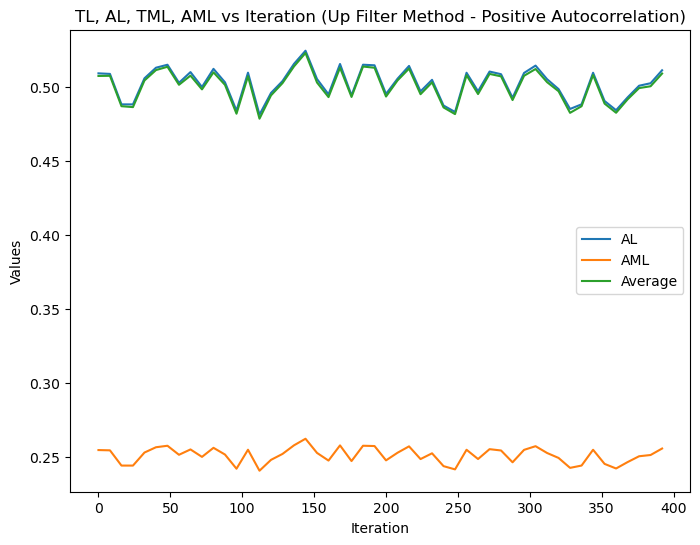

In [ ]:
# get up method ac positive
up_positive = results_df[(results_df['Filter Method'] == 'up') & (results_df['Autocorrlation'] == 'positive')]

# Create a figure and axis
fig, ax = plt.subplots(figsize=(8, 6))

# Plot all columns against 'Iteration' on the same plot
# ax.plot(up_positive['Iteration'], up_positive['TL'], label='TL')
ax.plot(up_positive['Iteration'], up_positive['AL'], label='AL')
# ax.plot(up_positive['Iteration'], up_positive['TML'], label='TML')
ax.plot(up_positive['Iteration'], up_positive['AML'], label='AML')
ax.plot(up_positive['Iteration'], up_positive['Average'], label='Average')

# Labels and title
ax.set_xlabel('Iteration')
ax.set_ylabel('Values')
ax.set_title("TL, AL, TML, AML vs Iteration (Up Filter Method - Positive Autocorrelation)")

# Add legend
ax.legend()

# Show the plot
plt.show()


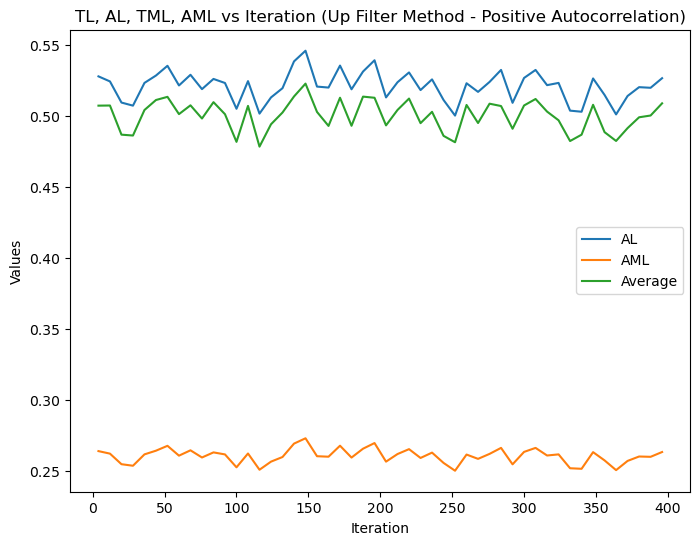

In [ ]:
# get up method ac positive
up_positive = results_df[(results_df['Filter Method'] == 'up') & (results_df['Autocorrlation'] == 'random')]

# Create a figure and axis
fig, ax = plt.subplots(figsize=(8, 6))

# Plot all columns against 'Iteration' on the same plot
# ax.plot(up_positive['Iteration'], up_positive['TL'], label='TL')
ax.plot(up_positive['Iteration'], up_positive['AL'], label='AL')
# ax.plot(up_positive['Iteration'], up_positive['TML'], label='TML')
ax.plot(up_positive['Iteration'], up_positive['AML'], label='AML')
ax.plot(up_positive['Iteration'], up_positive['Average'], label='Average')

# Labels and title
ax.set_xlabel('Iteration')
ax.set_ylabel('Values')
ax.set_title("TL, AL, TML, AML vs Iteration (Up Filter Method - Positive Autocorrelation)")

# Add legend
ax.legend()

# Show the plot
plt.show()

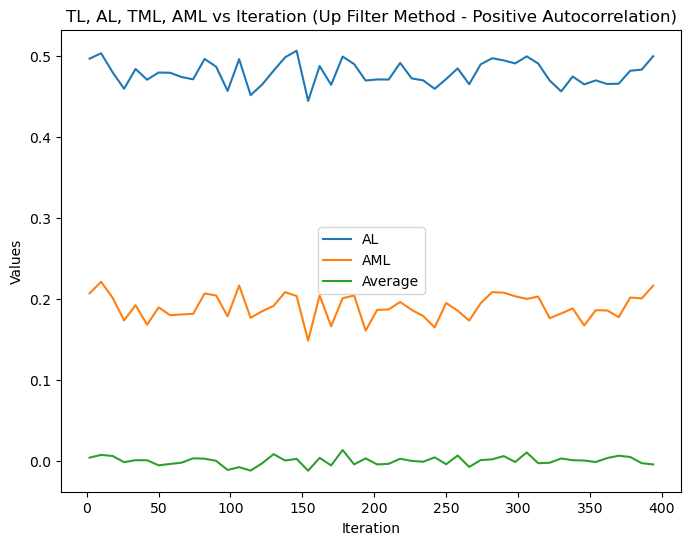

In [ ]:
# get up method ac positive
up_positive = results_df[(results_df['Filter Method'] == 'up') & (results_df['Autocorrlation'] == 'negative')]

# Create a figure and axis
fig, ax = plt.subplots(figsize=(8, 6))

# Plot all columns against 'Iteration' on the same plot
# ax.plot(up_positive['Iteration'], up_positive['TL'], label='TL')
ax.plot(up_positive['Iteration'], up_positive['AL'], label='AL')
# ax.plot(up_positive['Iteration'], up_positive['TML'], label='TML')
ax.plot(up_positive['Iteration'], up_positive['AML'], label='AML')
ax.plot(up_positive['Iteration'], up_positive['Average'], label='Average')

# Labels and title
ax.set_xlabel('Iteration')
ax.set_ylabel('Values')
ax.set_title("TL, AL, TML, AML vs Iteration (Up Filter Method - Positive Autocorrelation)")

# Add legend
ax.legend()

# Show the plot
plt.show()

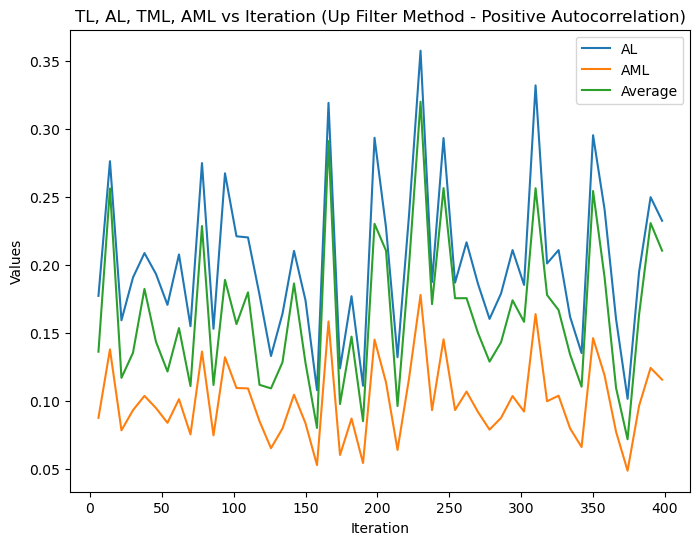

In [ ]:
# get up method ac positive
up_positive = results_df[(results_df['Filter Method'] == 'up') & (results_df['Autocorrlation'] == 'cluster')]

# Create a figure and axis
fig, ax = plt.subplots(figsize=(8, 6))

# Plot all columns against 'Iteration' on the same plot
# ax.plot(up_positive['Iteration'], up_positive['TL'], label='TL')
ax.plot(up_positive['Iteration'], up_positive['AL'], label='AL')
# ax.plot(up_positive['Iteration'], up_positive['TML'], label='TML')
ax.plot(up_positive['Iteration'], up_positive['AML'], label='AML')
ax.plot(up_positive['Iteration'], up_positive['Average'], label='Average')

# Labels and title
ax.set_xlabel('Iteration')
ax.set_ylabel('Values')
ax.set_title("TL, AL, TML, AML vs Iteration (Up Filter Method - Positive Autocorrelation)")

# Add legend
ax.legend()

# Show the plot
plt.show()